Name : **Nisarga Arsikere Chidananda**

Student_ID : **A05289369**

In [2]:
#importing the pandas library
import pandas as pd

**1. Load the file into a Jupyter notebook.**

In [3]:
#loading the file
df = pd.read_csv('/Users/harshams/Desktop/CIS5357_Assignments/Assignment10/co-est2022-alldata.csv')

**2. Filter for just the New York records (where Dig is located).**

In [4]:
#Filter for just the New York records
ny_df = df[df['STNAME'] == 'New York' ]

In [5]:
ny_df1 = ny_df[ny_df['SUMLEV'] == 50]

In [6]:
ny_df1

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,ESTIMATESBASE2020,POPESTIMATE2020,POPESTIMATE2021,...,RDEATH2021,RDEATH2022,RNATURALCHG2021,RNATURALCHG2022,RINTERNATIONALMIG2021,RINTERNATIONALMIG2022,RDOMESTICMIG2021,RDOMESTICMIG2022,RNETMIG2021,RNETMIG2022
1863,50,1,2,36,1,New York,Albany County,314838,313987,316301,...,9.468687,9.482497,-0.710786,-0.458779,1.519940,3.967651,6.311401,-4.742830,7.831341,-0.775179
1864,50,1,2,36,3,New York,Allegany County,46446,47320,46921,...,11.268981,11.087967,-1.803886,-1.281846,0.127333,0.491374,-7.003321,-3.909630,-6.875988,-3.418256
1865,50,1,2,36,5,New York,Bronx County,1472656,1461125,1421089,...,8.765484,8.913134,3.416124,4.012088,2.892221,7.914931,-32.537487,-43.104067,-29.645266,-35.189135
1866,50,1,2,36,7,New York,Broome County,198675,198126,198703,...,11.586855,11.737659,-2.751815,-2.612299,0.962631,2.455662,4.404920,-7.826790,5.367551,-5.371128
1867,50,1,2,36,9,New York,Cattaraugus County,77041,76992,76650,...,11.884771,11.940766,-1.496987,-1.149658,0.065086,0.209029,-3.592768,-1.306430,-3.527681,-1.097401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1920,50,1,2,36,115,New York,Washington County,61302,61202,60975,...,11.786179,11.837525,-3.093872,-2.873186,0.081848,0.246273,-1.358685,0.935838,-1.276836,1.182111
1921,50,1,2,36,117,New York,Wayne County,91286,91193,91201,...,10.186739,10.289262,-0.493437,-0.274234,0.076757,0.230357,-0.197375,-0.296173,-0.120618,-0.065816
1922,50,1,2,36,119,New York,Westchester County,1004445,1001431,999607,...,8.217735,8.220965,1.240356,1.589923,1.410268,3.919531,-4.970420,-15.056024,-3.560152,-11.136493
1923,50,1,2,36,121,New York,Wyoming County,40531,40427,40017,...,11.013873,11.119059,-2.834270,-2.585244,0.149172,0.326293,-7.607777,-6.425461,-7.458605,-6.099168


**3. Determine the counties with the highest and lowest population growth.**

**Method:1**

In [7]:
# Determine the county with the highest and lowest population growth
county_highest_growth = ny_df1['NPOPCHG2022'].idxmax()
county_lowest_growth = ny_df1['NPOPCHG2022'].idxmin()

In [8]:
print("County with the highest population growth:", ny_df1.at[county_highest_growth, 'CTYNAME'])
print("County with the lowest population growth:", ny_df1.at[county_lowest_growth, 'CTYNAME'])

County with the highest population growth: New York County
County with the lowest population growth: Queens County


**Method:2**

In [10]:
ny_df1.loc[:,'POPULATION GROWTH'] = ny_df1['POPESTIMATE2022'] - ny_df1['POPESTIMATE2021']

In [74]:
county_high_growth = ny_df1.loc[ny_df1['POPULATION GROWTH'].idxmax()]
county_low_growth = ny_df1.loc[ny_df1['POPULATION GROWTH'].idxmin()]

In [75]:
print("County with the highest population growth:")
print(county_high_growth[['CTYNAME', 'POPULATION_GROWTH']])

County with the highest population growth:
CTYNAME              New York County
POPULATION_GROWTH              17472
Name: 1893, dtype: object


In [76]:
print("\nCounty with the lowest population growth:")
print(county_low_growth[['CTYNAME', 'POPULATION_GROWTH']])


County with the lowest population growth:
CTYNAME              Queens County
POPULATION_GROWTH           -50112
Name: 1903, dtype: object


**4. Create a new field that estimates the future population growth for each county based on the recent growth rate trends provided in the file.**

**Method:1**

In [12]:
ny_df1.loc[:,'Avg_Annual_Growth'] = (ny_df1['NPOPCHG2022'] - ny_df1['NPOPCHG2021']) / 2

In [14]:
ny_df1.loc[:,'Estimated_Pop_Growth_2023'] = ny_df1['POPESTIMATE2022'] + ny_df1['Avg_Annual_Growth']

In [15]:
ny_df1[['CTYNAME','Estimated_Pop_Growth_2023']].round()

,CTYNAME,Estimated_Pop_Growth_2023
1863,Albany County,314409.0
1864,Allegany County,46780.0
1865,Bronx County,1379392.0
1866,Broome County,196036.0
1867,Cattaraugus County,76504.0
...,...,...
1920,Washington County,60888.0
1921,Wayne County,91083.0
1922,Westchester County,986749.0
1923,Wyoming County,39696.0


**Method:2**

In [17]:
ny_df1.loc[:,'FUTURE_2023'] = ny_df1['POPESTIMATE2022'] + ny_df1['POPULATION GROWTH']

In [18]:
ny_df1[['CTYNAME','FUTURE_2023']]

,CTYNAME,FUTURE_2023
1863,Albany County,315321
1864,Allegany County,46467
1865,Bronx County,1338803
1866,Broome County,195531
1867,Cattaraugus County,76228
...,...,...
1920,Washington County,60707
1921,Wayne County,91049
1922,Westchester County,981247
1923,Wyoming County,39315


**Method:3**

In [20]:
ny_df1.loc[:, 'FUTURE_POPULATION_ESTIMATE'] = ny_df1['POPESTIMATE2022'] + ny_df1['NPOPCHG2022']

In [21]:
ny_df1[['CTYNAME','FUTURE_POPULATION_ESTIMATE']]

,CTYNAME,FUTURE_POPULATION_ESTIMATE
1863,Albany County,315321
1864,Allegany County,46467
1865,Bronx County,1338803
1866,Broome County,195531
1867,Cattaraugus County,76228
...,...,...
1920,Washington County,60707
1921,Wayne County,91049
1922,Westchester County,981247
1923,Wyoming County,39315


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

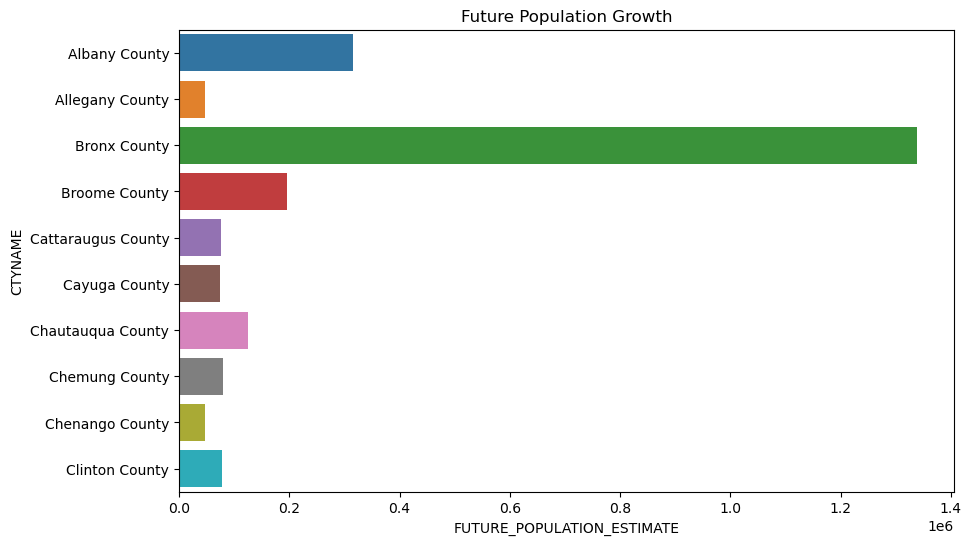

In [25]:
plt.figure(figsize=(10, 6))
plt.title('Future Population Growth')
sns.barplot(x='FUTURE_POPULATION_ESTIMATE', y='CTYNAME', data=ny_df1.head(10))
plt.show()

**5. Consider how we might join this data to our existing Dig files. You do not need to perform the join (we'll learn more about this next week), but include markdown comments in your notebook submission about how we could bring this data into our Dig case information.**

### Integrating County Population Data with Dig's Case Information

To combine the population data with Dig's existing case information, we can use the county FIPS code as a common identifier for the merge. The county FIPS code is a unique identifier assigned to each county in the United States. By matching the county FIPS codes between the two datasets, we can create a unified dataset that incorporates both the population data and the case information.

Here are the steps we could follow to integrate the population data with Dig's case information:

1. Ensure that both datasets have a common column containing the county FIPS code.

2. Load both datasets into the Jupyter notebook and examine the structure of each dataset to identify the relevant columns for merging.

3. Use the Pandas library's merge function to combine the datasets based on the county FIPS code. This will create a new DataFrame that incorporates information from both datasets.

4. Perform any necessary data cleaning, such as handling missing values or formatting inconsistencies, to ensure the integrity of the merged dataset.

5. Conduct exploratory data analysis (EDA) on the merged dataset to gain insights into potential correlations between population trends and Dig's case information.

6. Utilize visualization tools, such as Matplotlib or Seaborn, to create informative graphs and charts that depict the relationship between population dynamics and Dig's business operations.

By following these steps, we can leverage the combined dataset to make data-driven decisions regarding Dig's expansion plans, customer targeting strategies, and market analysis.

### Note :

* This information has the potential to be incorporated into the Restaurants.csv file. If we can determine the  specific county for each location, we'll be able to offer relevant county-related details for each restaurant. Merging these two sets of data would enable individuals to view the projected population increase for each county where the restaurants are located, which could be valuable information.

* We can use .join() or .merge() to join the data by using a common_key which present in both datasets.